In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np
from datetime import datetime
import seaborn as sns

In [190]:
df = pd.read_csv('construction_project_status 2.csv')
df.head(3)

,Project ID,Site Location,Project Status,Material Cost,Labor Hours,Project Progress,Report Date
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20


In [191]:
dfs = df.copy()

new_cols = []
for x in dfs.columns:
    new_cols.append(x.replace(' ', '_'))

dfs.columns = new_cols
dfs.columns

Index(['Project_ID', 'Site_Location', 'Project_Status', 'Material_Cost',
       'Labor_Hours', 'Project_Progress', 'Report_Date'],
      dtype='object')

#### Removing duplicates in IDs

In [192]:
dfs.drop_duplicates(subset=['Project_ID'], inplace=True)

#### Replacing missing values/NAs in Materia cost and Labor hours with mean values

In [193]:
dfs.replace(['NA', 'NaN', 'Missing', 'Null', 'null'], np.nan, inplace=True)
dfs['Material_Cost'] = dfs['Material_Cost'].fillna(dfs['Material_Cost'].mean())
dfs['Labor_Hours'] = dfs['Labor_Hours'].fillna(dfs['Labor_Hours'].mean())

#### Converting to appropriate data type

In [194]:
dfs['Report_Date'] = pd.to_datetime(dfs['Report_Date'])
dfs['Project_Progress_New'] = dfs['Project_Progress'].str.rstrip('%').astype(float)
dfs.head(3)

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
0,P001,Site A,In Progress,150000.0,2500.0,75%,2024-01-15,75.0
1,P002,Site B,Completed,120000.0,1800.0,100%,2023-12-01,100.0
2,P003,Site C,Delayed,200000.0,3000.0,50%,2024-01-20,50.0


In [195]:
dfs['Project_Status'] = dfs['Project_Status'].str.title()

In [196]:
def check_outliers(dfs, column):
    q1 = dfs[column].quantile(0.25)
    q3 = dfs[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    max_value = dfs[column].max()
    min_value = dfs[column].min()

    print(f"lower bound is {lower_bound}")
    print(f"upper bound is {upper_bound}")
    print(f"min value is {min_value}")
    print(f"max value is {max_value}")

    outliers = dfs[(dfs[column] < lower_bound) | (dfs[column] > upper_bound)]
    if outliers.empty:
        print('There are no outliers')
    else:
        print('There are outliers')


In [197]:
print('Material Cost'.center(20, '-'))
check_outliers(dfs, 'Material_Cost')
print('')

print('Labor Hours'.center(20, '-'))
check_outliers(dfs, 'Labor_Hours')
print('')

print('Project Progress'.center(20, '-'))
check_outliers(dfs, 'Project_Progress_New')

---Material Cost----
lower bound is 10000.0
upper bound is 370000.0
min value is 90000.0
max value is 340000.0
There are no outliers

----Labor Hours-----
lower bound is 168.75
upper bound is 5418.75
min value is 1400.0
max value is 4600.0
There are no outliers

--Project Progress--
lower bound is 35.625
upper bound is 138.625
min value is 40.0
max value is 100.0
There are no outliers


BoxPlot


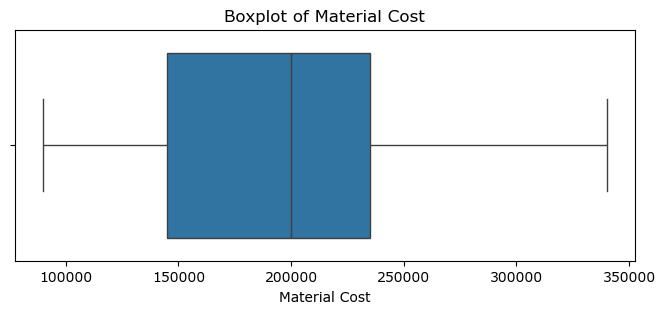

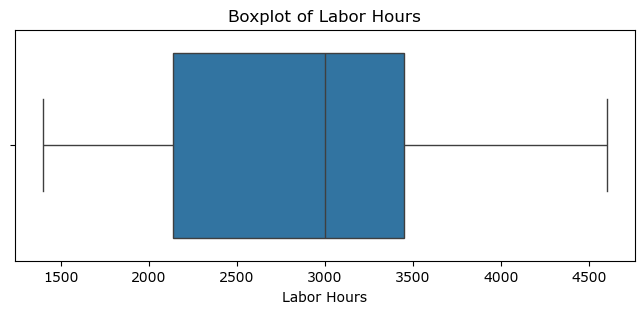

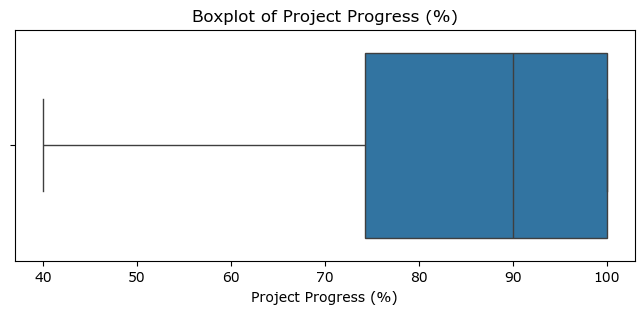

In [198]:
print('BoxPlot')
# Boxplot for Material Cost
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Material_Cost'])
plt.title('Boxplot of Material Cost')
plt.xlabel('Material Cost')
plt.show()

# Boxplot for Labor Hours
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Labor_Hours'])
plt.title('Boxplot of Labor Hours')
plt.xlabel('Labor Hours')
plt.show()

# Boxplot for Project Progress
plt.figure(figsize=(8, 3))
sns.boxplot(x=dfs['Project_Progress_New'])
plt.title('Boxplot of Project Progress (%)')
plt.xlabel('Project Progress (%)')
plt.show()

#### Cost Efficiency: Which 'Site Location' has the highest average 'Material Cost' per project, and which has the lowest?

In [199]:
average_mat_cost = dfs.groupby('Site_Location')['Material_Cost'].mean().sort_values(ascending=False).round(2)
max_average_site = average_mat_cost.idxmax()
max_cost = average_mat_cost.max()
min_average_site = average_mat_cost.idxmin()
min_cost = average_mat_cost.min()
average_mat_cost
average_mat_cost_df = average_mat_cost.reset_index()
average_mat_cost_df.columns = ['Site Location', 'Average Material Cost']
average_mat_cost_df

,Site Location,Average Material Cost
0,Site H,285000.00
1,Site E,244615.38
2,Site C,224230.77
3,Site F,212083.33
4,Site A,185357.14
5,Site B,153324.92
6,Site D,132083.33
7,Site G,117500.00


In [200]:
print(f"{max_average_site} has the highest average, spending {max_cost} while {min_average_site} has the lowest average, spending {min_cost}")

Site H has the highest average, spending 285000.0 while Site G has the lowest average, spending 117500.0


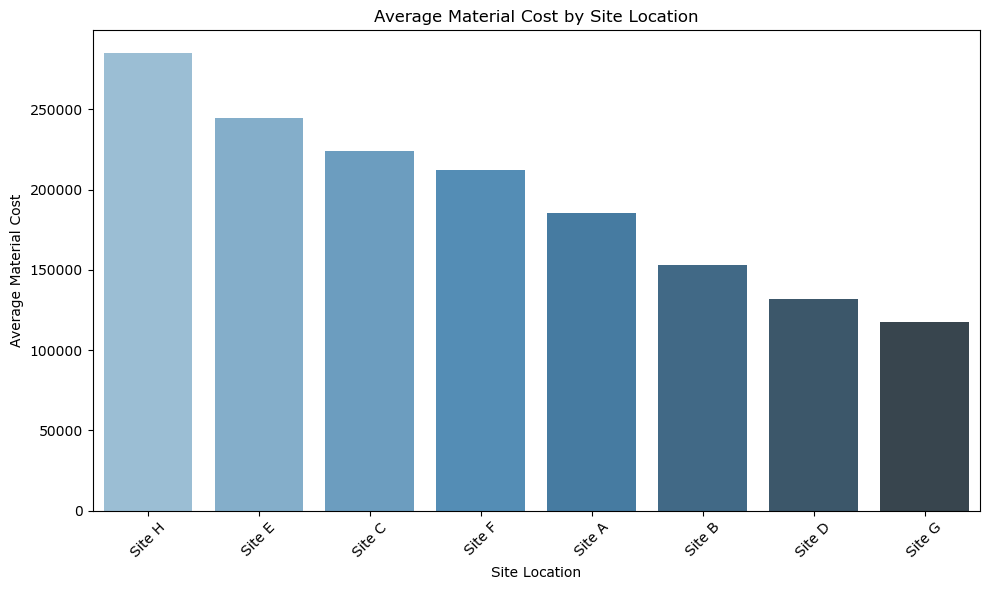

In [201]:
plt.figure(figsize=(10, 6))
sns.barplot(data=average_mat_cost_df, x='Site Location', y='Average Material Cost', hue='Site Location', palette='Blues_d', legend=False)

plt.title('Average Material Cost by Site Location')
plt.xlabel('Site Location')
plt.ylabel('Average Material Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Labor Utilization: Is there a correlation between 'Labor Hours' and 'Project Progress'

-0.36
There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly


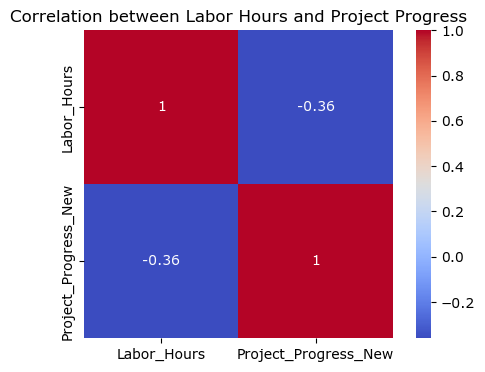

In [212]:
labour_project_corr = dfs['Labor_Hours'].corr(dfs['Project_Progress_New'])

print(f"{labour_project_corr:.2f}")
print('There is a negative correlation. as Labor Hours increase, Project Progress tends to decrease slightly')

labour_project_corr = dfs[['Labor_Hours', 'Project_Progress_New']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(labour_project_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Labor Hours and Project Progress')
plt.show()

In [203]:
dfs.sample(3)

,Project_ID,Site_Location,Project_Status,Material_Cost,Labor_Hours,Project_Progress,Report_Date,Project_Progress_New
49,P042,Site F,Completed,205000.0,3150.0,100%,2024-07-01,100.0
86,P075,Site G,Completed,130000.0,1850.0,100%,2024-11-25,100.0
22,P019,Site E,Delayed,225000.0,3300.0,48%,2024-03-25,48.0


#### Provide a count of projects in each 'Project Status' (e.g., "Completed", "In Progress", "Delayed").

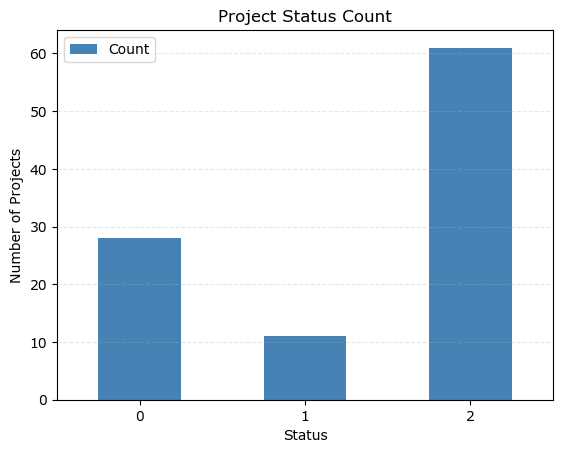

In [204]:
status_group = dfs.groupby('Project_Status').size().reset_index(name='Count')
status_group.plot(kind='bar', color='steelblue')
plt.title('Project Status Count')
plt.xlabel('Status')
plt.ylabel('Number of Projects')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

#### Monthly Trends: What are the total 'Material Cost' and 'Labor Hours' incurred each month, based on the 'Report Date'?

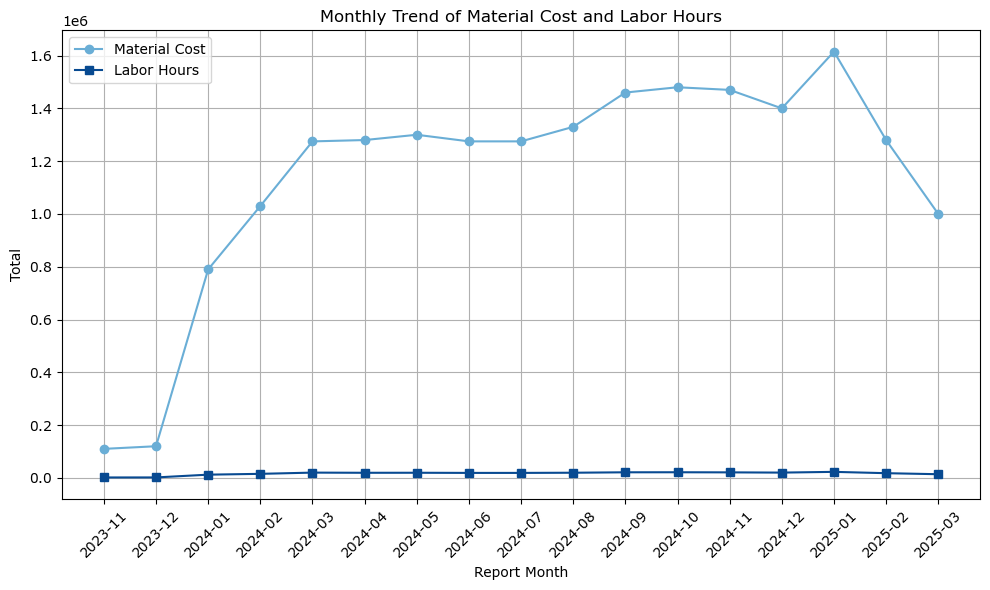

In [219]:
dfs['Report_Month'] = dfs['Report_Date'].dt.to_period('M')
trend = dfs.groupby('Report_Month')[['Material_Cost', 'Labor_Hours']].sum().round(2)

line_colors = plt.cm.Blues(np.linspace(0.5, 0.9, 2))

plt.figure(figsize=(10, 6))
plt.plot(trend.index.astype(str), trend['Material_Cost'], label='Material Cost', marker='o', color=line_colors[0])
plt.plot(trend.index.astype(str), trend['Labor_Hours'], label='Labor Hours', marker='s', color=line_colors[1])

plt.title('Monthly Trend of Material Cost and Labor Hours')
plt.xlabel('Report Month')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Top 5 and Bottom 5 Projects: Based on a combined metric of 'Material Cost' and 'Labor Hours'

In [206]:
avg_labor_hour = dfs['Labor_Hours'].mean().round(2)
avg_material_cost = dfs['Material_Cost'].mean().round(2)
avg_labor_rate = (avg_material_cost/avg_labor_hour).round(2)
dfs['Total_Cost'] = (dfs['Material_Cost'] + dfs['Labor_Hours']) * avg_labor_rate
top_5 = dfs.nlargest(5, 'Total_Cost')
bottom_5 = dfs.nsmallest(5, 'Total_Cost')

In [207]:
top_5[['Project_ID', 'Site_Location', 'Project_Progress']]

,Project_ID,Site_Location,Project_Progress
114,P100,Site H,90%
105,P092,Site H,85%
96,P084,Site H,80%
87,P076,Site H,75%
78,P068,Site H,70%


In [208]:
bottom_5[['Project_ID', 'Site_Location', 'Project_Progress']]

,Project_ID,Site_Location,Project_Progress
16,P014,Site G,100%
25,P021,Site G,95%
10,P010,Site D,90%
33,P028,Site G,98%
41,P035,Site G,100%


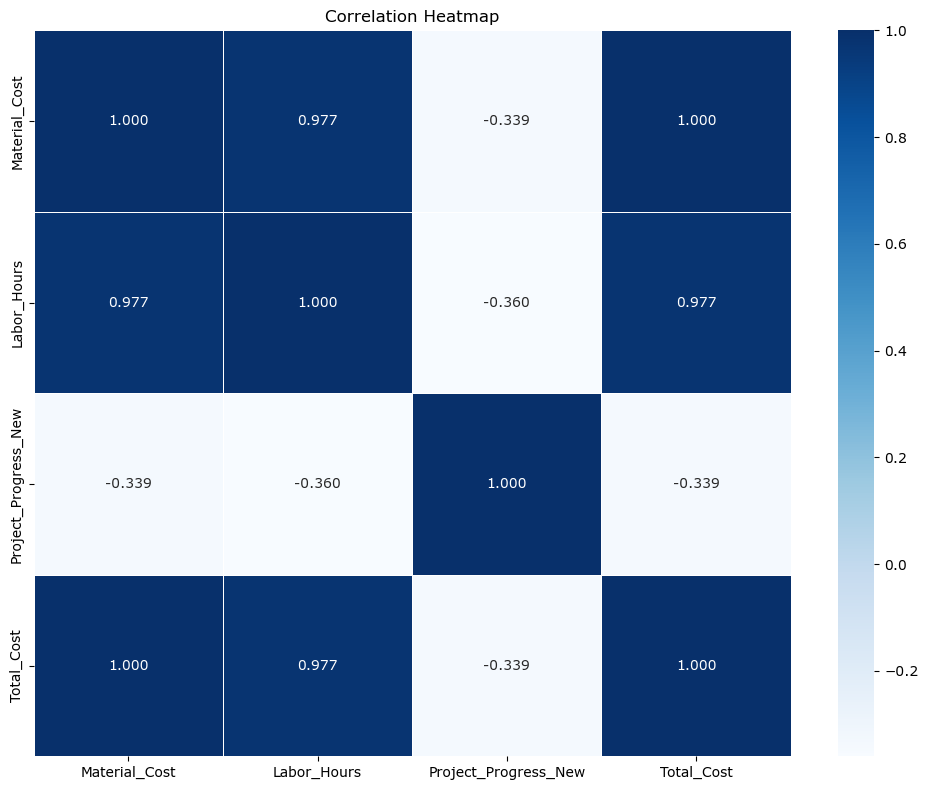

In [209]:
cols = ['Material_Cost', 'Labor_Hours', 'Project_Progress_New', 'Total_Cost']

plt.figure(figsize=(10, 8))
sns.heatmap(
    dfs[cols].corr(),
    annot=True,
    cmap='Blues',
    fmt='.3f',
    linewidths=0.6
)
plt.xticks(rotation=0, ha='center')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [210]:
insights = pd.DataFrame({
    'Metric': [
        'Site with Highest Avg Material Cost',
        'Highest Avg Material Cost',
        'Site with Lowest Avg Material Cost',
        'Lowest Avg Material Cost',
        'Labor Hours vs Project Progress (Correlation)'
    ],
    'Value': [
        max_average_site,
        max_cost,
        min_average_site,
        min_cost,
        labour_project_corr
    ]
})

### === Export to Excel ===

In [211]:
with pd.ExcelWriter('cleaned_construction_data.xlsx', engine='xlsxwriter') as writer:
    dfs.to_excel(writer, sheet_name='Cleaned_Data', index=False)
    insights.to_excel(writer, sheet_name='Analysis_Insights', index=False)
    
    # Export trend and project status on same sheet for clarity
    trend.to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+3)
    status_group.to_excel(writer, sheet_name='Analysis_Insights', startrow=len(insights)+len(trend)+6)
    
    # Export top & bottom projects
    top_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=0)
    bottom_5.to_excel(writer, sheet_name='Top_Bottom_Projects', index=False, startrow=top_5.shape[0] + 3)